## Dog or Not Dog [shiv]

In [1]:
from imgdata import ImgData
import numpy as np

Total 1001 image files found


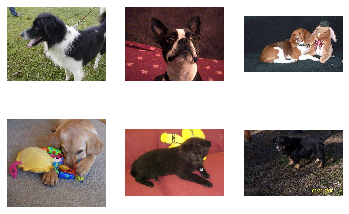

In [2]:
idog= ImgData("data/dog/")
idog.get_all_files()
idog.plot_raw_sample(rows= 2, cols= 3)

In [3]:
dog_data = idog.process(size=(150,150), count= 500, silent= True)

Resizing DONE
Converting to NP DONE


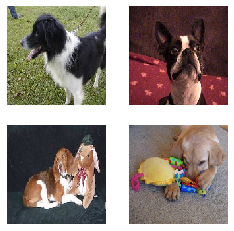

In [4]:
idog.plot_np_imgs(dog_data)

Total 500 image files found


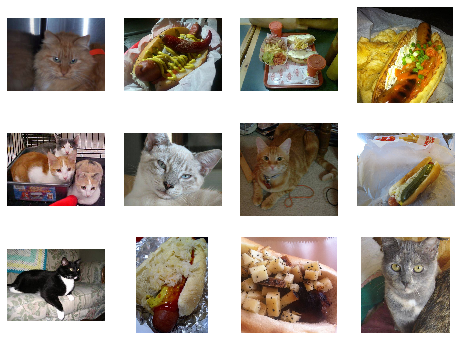

In [5]:
indog= ImgData("data/notdog/")
indog.get_all_files()
indog.plot_raw_sample(rows= 3, cols= 4)

In [6]:
ndog_data = indog.process(size=(150,150), count= 500, silent= True)

Resizing DONE
Converting to NP DONE


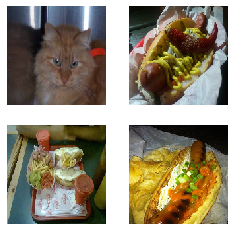

In [7]:
indog.plot_np_imgs(ndog_data)

### Combining

In [8]:
y_dog= np.zeros((dog_data.shape[0], 1))
y_ndog= np.ones((ndog_data.shape[0], 1))
print(y_dog.shape, y_ndog.shape)

(500, 1) (500, 1)


In [70]:
X, y= idog.shuffle([(dog_data, y_dog), (ndog_data, y_ndog)])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 150, 150, 3)
(750, 1)
(250, 150, 150, 3)
(250, 1)


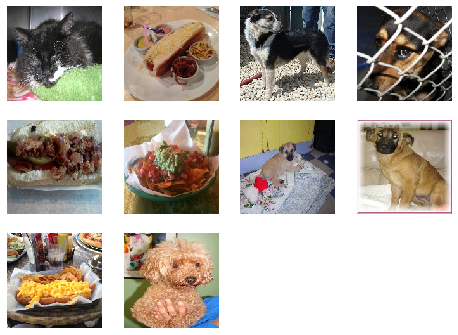

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [73]:
idog.plot_np_imgs(X_train, count=10)
print(y_train[:10])

## Model Building

In [74]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [75]:
img_input= layers.Input(shape=(150, 150, 3))

In [76]:
x= layers.Conv2D(16, 3, activation='relu')(img_input)

In [77]:
x= layers.MaxPool2D(2)(x)

In [78]:
x= layers.Conv2D(32, 3, activation='relu')(x)

In [79]:
x= layers.MaxPool2D(2)(x)

In [80]:
x= layers.Conv2D(64, 3, activation='relu')(x)

In [81]:
x= layers.MaxPool2D(2)(x)

In [82]:
x= layers.Flatten()(x)

In [83]:
x= layers.Dense(512, activation='relu')(x)

In [84]:
output= layers.Dense(1, activation='sigmoid')(x)

In [85]:
model= Model(img_input, output)

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
__________

In [87]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [88]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 750 samples, validate on 250 samples
Epoch 1/5
750/750 [==============================] - 22s 29ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 2/5
750/750 [==============================] - 22s 29ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 3/5
750/750 [==============================] - 26s 34ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 4/5
750/750 [==============================] - 25s 34ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360
Epoch 5/5
750/750 [==============================] - 26s 34ms/sample - loss: 8.2525 - acc: 0.4880 - val_loss: 7.4788 - val_acc: 0.5360


In [45]:
y_pred= model.predict(np.array([imgs[1]]))
y_pred

NameError: name 'imgs' is not defined